In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from scipy import stats


In [2]:
# boston = datasets.load_boston()
# print(boston.DESCR)
boston = pd.read_csv('df_boston.csv')

## Q1: Save the dataset into pandas dataframe

In [3]:
# df_boston.head()
df_boston = pd.DataFrame(boston)
df_boston

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Q2: Use different histograms to plot features that have right, left and zero skew.

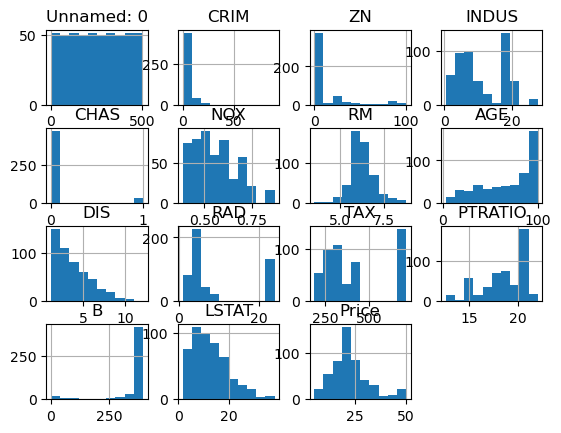

In [4]:
#showing all histogram
df_boston.hist()
plt.show()

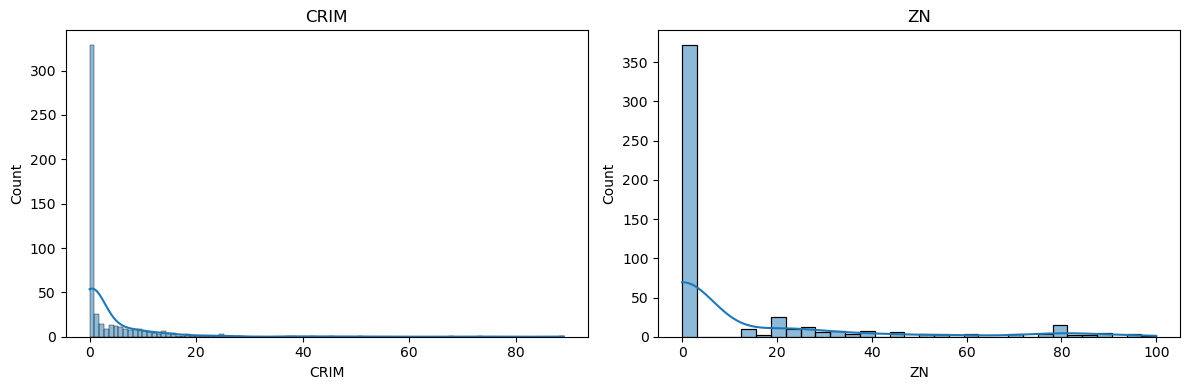

In [5]:
# Specify the features with right skew
features1 = ['CRIM','ZN']
# Plot histograms for features with right skew
plt.figure(figsize=(12, 4))
for i, feature in enumerate(features1):
    plt.subplot(1, len(features1), i+1)
    sns.histplot(data=df_boston, x=feature, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

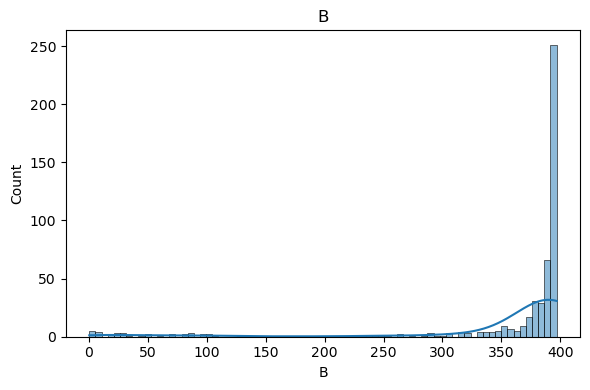

In [6]:
# Specify the features with left skew
features2 = ['B']
# Plot histograms for features with left skew
plt.figure(figsize=(6, 4))
for i, feature in enumerate(features2):
    plt.subplot(1, len(features2), i+1)
    sns.histplot(data=df_boston, x=feature, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

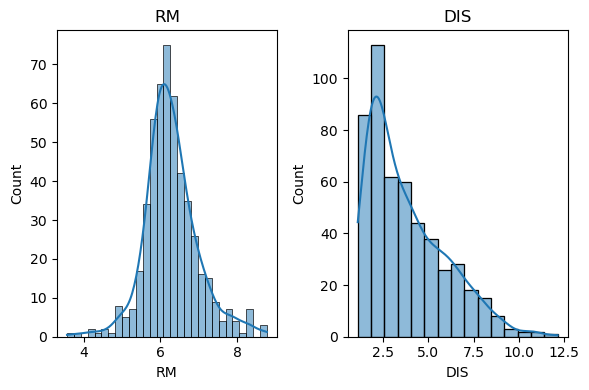

In [7]:
# Specify the features with zero skew
features3 = ['RM',  'DIS']
# Plot histograms for features with zero skew
plt.figure(figsize=(6, 4))
for i, feature in enumerate(features3):
    plt.subplot(1, len(features3), i+1)
    sns.histplot(data=df_boston, x=feature, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

## Q3: Prove your previous result using mean, median and mode.

In [8]:
#To prove this the median should be less than the mean. (Mode < Median < Mean)
features1 = ['CRIM','ZN']
for feature in features1:
    data = df_boston[feature]
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)[0][0]
    print(f'Feature: {feature}')
    print(f'Mean: {mean:.1f}')
    print(f'Median: {median:.1f}')
    print(f'Mode: {mode:.1f}')
    print('')

Feature: CRIM
Mean: 3.6
Median: 0.3
Mode: 0.0

Feature: ZN
Mean: 11.4
Median: 0.0
Mode: 0.0



In [9]:
#To prove this the median should be more than the mean. (Mode > Median > Mean)
features2 = ['B']
# Compute mean, median, and mode for features with zero skew
for feature in features2:
    data = df_boston[feature]
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)[0][0]
    print(f'Feature: {feature}')
    print(f'Mean: {mean:.1f}')
    print(f'Median: {median:.1f}')
    print(f'Mode: {mode:.1f}')
    print('')

Feature: B
Mean: 356.7
Median: 391.4
Mode: 396.9



In [10]:
#To prove this the median should be equal the mean. (Mode = Median = Mean)
features3 = ['RM',  'DIS']
# Compute mean, median, and mode for features with zero skew
for feature in features3:
    data = df_boston[feature]
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)[0][0]
    print(f'Feature: {feature}')
    print(f'Mean: {mean:.1f}')
    print(f'Median: {median:.1f}')
    print(f'Mode: {mode:.1f}')
    print('')

Feature: RM
Mean: 6.3
Median: 6.2
Mode: 5.7

Feature: DIS
Mean: 3.8
Median: 3.2
Mode: 3.5



## Q4: Use Skew function of Pandas to print skewness of each feature.

In [11]:
# Compute skewness for each feature
skewness = df_boston.skew()
# Print the skewness of each feature
for feature, skew in skewness.items():
    print(f'Feature: {feature}')
    print(f'Skewness: {skew:.1f}')
    print('')

Feature: Unnamed: 0
Skewness: 0.0

Feature: CRIM
Skewness: 5.2

Feature: ZN
Skewness: 2.2

Feature: INDUS
Skewness: 0.3

Feature: CHAS
Skewness: 3.4

Feature: NOX
Skewness: 0.7

Feature: RM
Skewness: 0.4

Feature: AGE
Skewness: -0.6

Feature: DIS
Skewness: 1.0

Feature: RAD
Skewness: 1.0

Feature: TAX
Skewness: 0.7

Feature: PTRATIO
Skewness: -0.8

Feature: B
Skewness: -2.9

Feature: LSTAT
Skewness: 0.9

Feature: Price
Skewness: 1.1



## Q5: Use numpy to draw normal distribution.

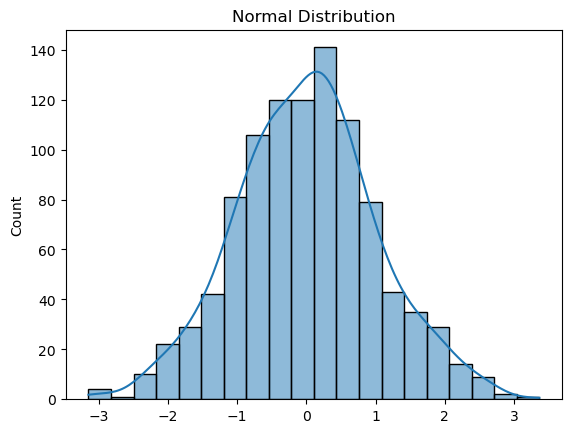

In [12]:
# # Generate random samples from a normal distribution
samples = np.random.normal(0, 1, 1000) #mean = 0, standard deviation =1 , Number of Samples = 1000
sns.histplot(samples,bins= 20, alpha=0.5, kde=True)
plt.title('Normal Distribution')
plt.show()

## Q6: Use numpy to draw uniform distribution.

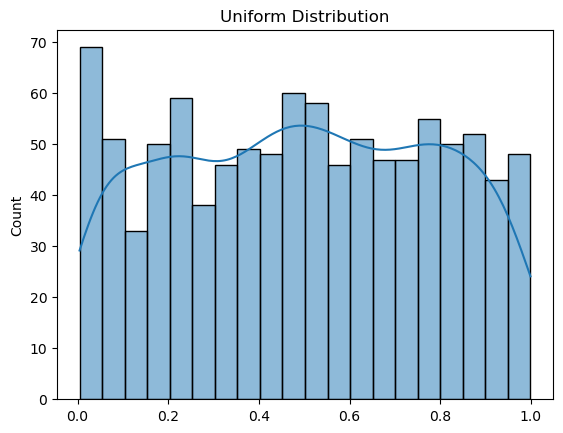

In [13]:
# Generate random samples from a uniform distribution
samples = np.random.uniform(0, 1, 1000) #lower_bound = 0, upper_bound = 1 , Number of Samples = 1000 
sns.histplot(samples, bins= 20, alpha=0.5, kde=True)
plt.title('Uniform Distribution')
plt.show()

## Q7: Use numpy to draw binomial distribution.

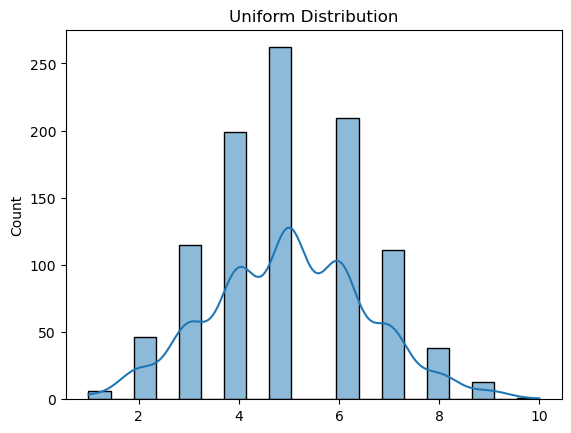

In [14]:
# Generate random samples from a uniform distribution
samples = np.random.binomial(10, 0.5, 1000) #ntrials = 10, probability = 0.5 , Number of Samples = 1000 
sns.histplot(samples, bins= 20, alpha=0.5, kde=True)
plt.title('Uniform Distribution')
plt.show()

## Q8: Simulate Two Coin Flips, then draw the result distribution.

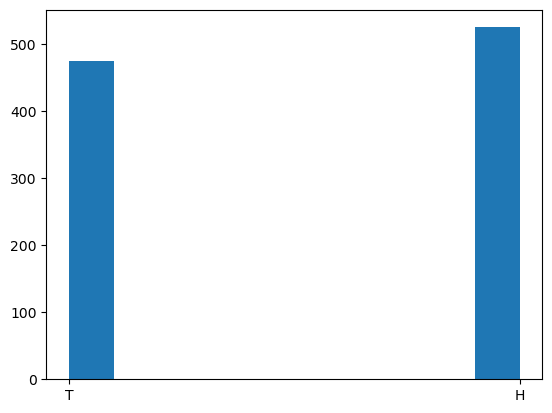

In [15]:
sample4 = np.random.choice(['H','T'], size=1000)
plt.hist(sample4)
plt.show()

## Q9: Summary of Descriptive Statistics

1. Using scipy.stats
- nobs: the number of observations or elements in your dataset
- minmax: the tuple with the minimum and maximum values of your dataset
- mean: the mean of your dataset
- variance: the variance of your dataset
- skewness: the skewness of your dataset
- kurtosis: the kurtosis of your dataset

In [16]:
stats.describe(df_boston)

DescribeResult(nobs=506, minmax=(array([0.0000e+00, 6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00,
       3.8500e-01, 3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00,
       1.8700e+02, 1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+00]), array([505.    ,  88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,
         8.78  , 100.    ,  12.1265,  24.    , 711.    ,  22.    ,
       396.9   ,  37.97  ,  50.    ])), mean=array([2.52500000e+02, 3.61352356e+00, 1.13636364e+01, 1.11367787e+01,
       6.91699605e-02, 5.54695059e-01, 6.28463439e+00, 6.85749012e+01,
       3.79504269e+00, 9.54940711e+00, 4.08237154e+02, 1.84555336e+01,
       3.56674032e+02, 1.26530632e+01, 2.25328063e+01]), variance=array([2.13785000e+04, 7.39865782e+01, 5.43936814e+02, 4.70644425e+01,
       6.45129730e-02, 1.34276357e-02, 4.93670850e-01, 7.92358399e+02,
       4.43401514e+00, 7.58163660e+01, 2.84047595e+04, 4.68698912e+00,
       8.33475226e+03, 5.09947595e+01, 8.45867236e+01]), skewness=array([ 0.        ,  5.2076

2. method .describe()
- count: the number of elements in your dataset
- mean: the mean of your dataset
- std: the standard deviation of your dataset
- min and max: the minimum and maximum values of your dataset
- 25%, 50%, and 75%: the quartiles of your dataset

In [17]:
df_boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Q9: Summarize the differences between the Z-test and the T-test in three sentences.

In [18]:
# The Z-test is employed when there is prior knowledge of the population standard deviation, whereas the T-test is employed when the population standard deviation is uncertain and must be estimated using the sample.
# While the Z-test relies on the assumption of a normal distribution, the T-test is more resilient and can be applied even in cases where the data is only approximately normally distributed.
# The Z-test is commonly employed when dealing with large sample sizes, whereas the T-test is more suitable for situations involving small sample sizes.

## Calculate

Let's assume that a class's average score is higher than 70 with a standard deviation of 10.
Calculate the Z-value to determine whether there is sufficient data to support this claim at a 0.05 
significance level if a sample of 50 students was chosen and their mean score was 80.

In [19]:
# we will calculate the Z-value then calculate the critical Z-value, Finally compare the Z-value with the critical Z-value
average_score = 70
standard_deviation = 10
sample_size = 50
sample_mean_score = 80
significance_level = 0.05

Zvalue = (sample_mean_score - average_score) / (standard_deviation / (sample_size ** 0.5))
CZvalue = stats.norm.ppf(1 - significance_level)
if Zvalue > CZvalue:
    result = "There is sufficient data to support the claim."
else:
    result = "There is not sufficient data to support the claim."

print(f'Zvalue: {Zvalue:.1f}')
print(f'CZvalue: {CZvalue:.1f}')
print(result) 

Zvalue: 7.1
CZvalue: 1.6
There is sufficient data to support the claim.


An establishment wants to boost sales. According to past sales data, each sale made by 30 salesmen averaged 
40 dollar. The most recent data indicated that an average sale per transaction was 60 dollar after some training.Find the t-value for a 20 dollar standard deviation. Did a training program increase sales?

In [20]:
import math

sample_size = 30
Pmean = 40
Smean = 60
standard_deviation = 20

CTvalue = stats.t.ppf(1 - significance_level/2, ( sample_size - 1))
Tvalue = (Smean - Pmean) / (standard_deviation / math.sqrt(sample_size))

# Compare the t-value with the critical t-value
if abs(Tvalue) > CTvalue:
    result = "There is sufficient evidence to suggest that the training program increased sales."
else:
    result = "There is not sufficient evidence to suggest that the training program increased sales."
    
print(f'Tvalue: {Tvalue:.1f}')
print(f'Critical t-value: {CTvalue:.1f}')
print(result) 

Tvalue: 5.5
Critical t-value: 2.0
There is sufficient evidence to suggest that the training program increased sales.
